# Cutflows

**Goal:** To better understand the impact of these cuts on the signal and the background, look at the cutflows for the 500 GeV spin 2, c=1 RSG resonance.


If I end up doing this study for the other signals, I might want to check values against Beojean's and Sean's in the [cutflow twiki](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/Hh4bFullRun2CutFlowChallenge).

In [2]:
from root_numpy import root2array 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from root_numpy import list_trees
import ROOT

Welcome to JupyROOT 6.14/04


## Representative resonant singal

In [24]:
sigDir = "../../hh4b-resolved-reconstruction/btagStudies/"

f = ROOT.TFile.Open(sigDir + "M500_mv2_70.root")

h_2b = f.Get("TwoTagCutflow")
idx_2b = [h_2b.GetXaxis().GetBinLabel(ib) for ib in range(1,h_2b.GetNbinsX()+1)]
cf_2b = [h_2b.GetBinContent(ib) for ib in range(1,h_2b.GetNbinsX()+1)]

h_4b = f.Get("FourTagCutflow")
idx_4b = [h_4b.GetXaxis().GetBinLabel(ib) for ib in range(1,h_4b.GetNbinsX()+1)]
cf_4b = [h_4b.GetBinContent(ib) for ib in range(1,h_4b.GetNbinsX()+1)]
    

In [22]:
pd.DataFrame(cf_2b,idx_2b,columns=['$m_X$ = 500 GeV'])

$m_X$ = 500 GeV
Initial                                                50000.0
Selected                                               50000.0
NTuple                                                 35353.0
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged          26160.0
Two Tagged                                             10696.0
ΔR_jj                                                   4829.0
pT(h)s                                                  4687.0
Δη_hh                                                   4475.0
Xwt                                                     4173.0
Trigger                                                 3580.0
Signal                                                  1059.0
Control                                                  666.0
Sideband                                                 628.0

In [25]:
pd.DataFrame(cf_4b,idx_4b,columns=['$m_X$ = 500 GeV'])

$m_X$ = 500 GeV
Initial                                                50000.0
Selected                                               50000.0
NTuple                                                 35353.0
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged          26160.0
Four Tagged                                             4165.0
ΔR_jj                                                   3810.0
pT(h)s                                                  3765.0
Δη_hh                                                   3651.0
Xwt                                                     3363.0
Trigger                                                 3317.0
Signal                                                  1786.0
Control                                                  857.0
Sideband                                                 357.0

**Question:** Are the events in the Ntuple accounting for 
- jet cleaning
- JVT cut
*and what else*?

**Question:** What should be the difference between these `Initial` and `Selected` columns?

In [12]:
df

2 b-tag  4 b-tag
Initial                                              0        0
Selected                                             0        0
NTuple                                               0        0
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged        0        0
Four Tagged                                          0        0
ΔR_jj                                                0        0
pT(h)s                                               0        0
Δη_hh                                                0        0
Xwt                                                  0        0
Trigger                                              0        0
Signal                                               0        0
Control                                              0        0
Sideband                                             0        0

## QCD background

Look at the cutflow for the 2015 data

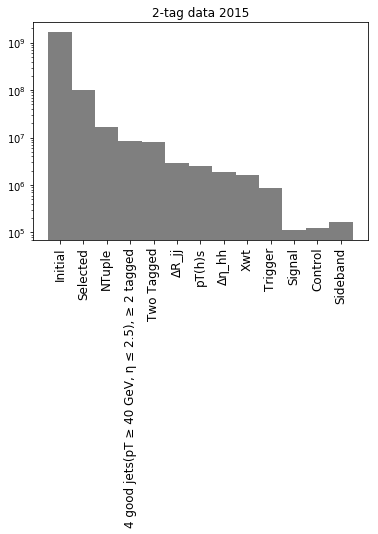

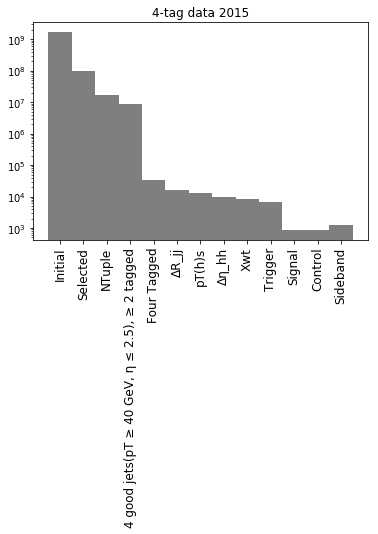

In [3]:
sigDir = "../../hh4b-resolved-reconstruction/btagStudies/"
f = ROOT.TFile.Open(sigDir + "data_15.root") 

figDir = 'figures/cutflows/'
dfs = []

for nTag, nTagName in zip([2,4],['Two','Four']):
    
    # Retrieve the ROOT histogram
    h = f.Get("{}TagCutflow".format(nTagName))
    x = np.arange(1,h.GetNbinsX()+1)
    
    idx = [h.GetXaxis().GetBinLabel(ib) for ib in range(1,h.GetNbinsX()+1)]
    counts = np.array([h.GetBinContent(ib) for ib in range(1,h.GetNbinsX()+1)])

    plt.figure()
    plt.bar(x,counts,width=1,alpha=0.5,color='k',log=True)
    plt.xticks(x,idx,rotation=90,fontsize=12)
    plt.title('{}-tag data 2015'.format(nTag))
    plt.savefig('{}/data15_{}b.pdf'.format(figDir,nTag),bbox_inches='tight')
    
    dfs.append(pd.DataFrame(counts,idx,columns=['data 2015']))
    
plt.show()

In [45]:
f.ls()

TFile**		../../hh4b-resolved-reconstruction/btagStudies/data_15.root	
 TFile*		../../hh4b-resolved-reconstruction/btagStudies/data_15.root	
  OBJ: TH1D	TwoTagCutflow	TwoTagCutflow : 0 at: 0xcc444d0
  OBJ: TH1D	FourTagCutflow	FourTagCutflow : 0 at: 0xcda8880
  KEY: TTree	fullmassplane;1	fullmassplane
  KEY: TTree	sig;1	sig
  KEY: TTree	control;1	control
  KEY: TTree	sideband;1	sideband
  KEY: TH1D	TwoTagCutflow;1	TwoTagCutflow
  KEY: TH1D	FourTagCutflow;1	FourTagCutflow


# SM NR

Look at the cutflow for the SM NR signal

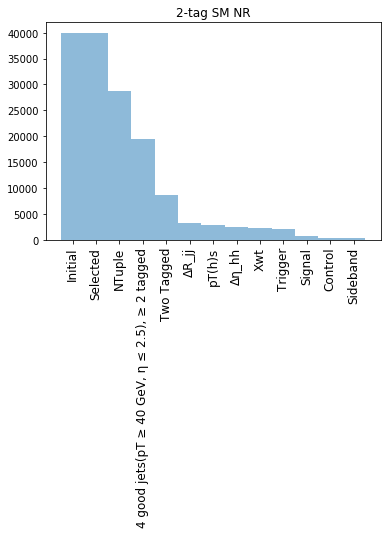

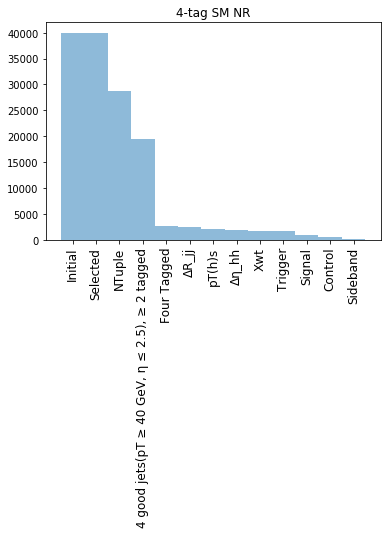

In [4]:
f = ROOT.TFile.Open(sigDir + "SM_NR_01.root")   
dfs = []

for nTag, nTagName in zip([2,4],['Two','Four']):
    
    # Retrieve the ROOT histogram
    h = f.Get("{}TagCutflow".format(nTagName))
    x = np.arange(1,h.GetNbinsX()+1)
    
    idx = [h.GetXaxis().GetBinLabel(ib) for ib in range(1,h.GetNbinsX()+1)]
    counts = np.array([h.GetBinContent(ib) for ib in range(1,h.GetNbinsX()+1)])

    plt.figure()
    plt.bar(x,counts,width=1,alpha=0.5,color='C0')
    plt.xticks(x,idx,rotation=90,fontsize=12)
    plt.title('{}-tag SM NR'.format(nTag))
    plt.savefig('{}/SMNR_{}b.pdf'.format(figDir,nTag),bbox_inches='tight')
    
    dfs.append(pd.DataFrame(counts,idx,columns=['SM NR']))
    
plt.show()

In [5]:
f.ls()

TFile**		../../hh4b-resolved-reconstruction/btagStudies/SM_NR_01.root	
 TFile*		../../hh4b-resolved-reconstruction/btagStudies/SM_NR_01.root	
  OBJ: TH1D	TwoTagCutflow	TwoTagCutflow : 0 at: 0xa586f70
  OBJ: TH1D	FourTagCutflow	FourTagCutflow : 0 at: 0xacee6e0
  KEY: TTree	fullmassplane;1	fullmassplane
  KEY: TTree	sig;1	sig
  KEY: TTree	control;1	control
  KEY: TTree	sideband;1	sideband
  KEY: TTree	afterPairing;1	afterPairing
  KEY: TTree	MDpTcut;1	MDpTcut
  KEY: TTree	detaHCs;1	detaHCs
  KEY: TTree	Xwt;1	Xwt
  KEY: TH1D	TwoTagCutflow;1	TwoTagCutflow
  KEY: TH1D	FourTagCutflow;1	FourTagCutflow


We have such a decrease in events from 4 good jets to the two tag requirement, because this two-tag filter tests for *exactly* two b-tags, not $\geq 2$.

In [6]:
# 2 tag numbers
dfs[0]

SM NR
Initial                                        40000.0
Selected                                       40000.0
NTuple                                         28730.0
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged  19450.0
Two Tagged                                      8729.0
ΔR_jj                                           3295.0
pT(h)s                                          2783.0
Δη_hh                                           2520.0
Xwt                                             2371.0
Trigger                                         2005.0
Signal                                           703.0
Control                                          441.0
Sideband                                         334.0

In [7]:
# 4 tag numbers
dfs[1]

SM NR
Initial                                        40000.0
Selected                                       40000.0
NTuple                                         28730.0
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged  19450.0
Four Tagged                                     2703.0
ΔR_jj                                           2395.0
pT(h)s                                          1995.0
Δη_hh                                           1832.0
Xwt                                             1725.0
Trigger                                         1699.0
Signal                                           922.0
Control                                          482.0
Sideband                                         185.0

## $t\bar{t}$: semi-leptonic

## $t\bar{t}$: all-hadronic

When there's time, I should verify this $t\bar{t}$ cutflow, because Sean and Beojean were seeing some discrepancies here.
